# Chapter 6 – Life: Moore's Multiform *Byron*

The final chapter of *Romanticism and the Contingent Self* is devoted to Thomas Moore's [*Letters and Journals of Lord Byron, with Notices of his Life*](https://www.lordbyron.org/contents.php?doc=ThMoore.1830.Contents) (1830-31), which was recognised in its day as a classic of literary biography. As in previous chapters, the aim is twofold. First, I seek to integrate a genre of 'contingent selfhood' into a general morphology of Romantic literature. Second, I see to establish appropriate aesthetic standards for judging 'formless' works of contingent selfhood. In this case, I focus on only a single case study. Moore's *Byron* is a vast text, and incorporates both 'monstrous' and 'multiple' portrayals of the self. Only a small number of literary biographies are available for comparison, so the analysis uses a smaller corpus.

In [140]:
from romanticself import BiographyCorpus, Biography, XMLBiography
from nltk import word_tokenize
import pandas as pd
import numpy as np
import rpy2
import seaborn as sns
from matplotlib import pyplot as plt
from seaborn import objects as so
corpus = BiographyCorpus("data/biography-corpus/", tokenizer = word_tokenize)
moore = corpus.data["moore.xml"]

sns.set_theme(style="darkgrid", palette="gray")

# Section 6.2 Plot: Ordered and Disordered lives

In the first section I analyse Moore's prose style.

What is the average sentence length for each biographer?


In [2]:
def biography_stats(biography: Biography) -> dict:
    return {
        "Author": biography.author,
        "Date": biography.date,
        "Title": biography.title,
        "Word count": len([token for token in biography.iter_tokens(allowed_authors = None)]),
        "Mean sentence length": np.mean([len(word_tokenize(sent.text)) for sent in biography.sentences])
    }

figure_6_1 = pd.DataFrame.from_records([biography_stats(bio) for bio in corpus])
figure_6_1.to_csv("figures/figure_6_1.csv")
display(figure_6_1)

,Author,Date,Title,Word count,Mean sentence length
0,John Galt,1830,The Life of Lord Byron,114742,36.989684
1,Elizabeth Gaskell,1857,The Life of Charlotte Brontë,209379,27.288414
2,John Gibson Lockhart,1837,"Memoirs of the Life of Sir Walter Scott, Bart.",999354,35.088445
3,Thomas Medwin,1847,The Life of Percy Bysshe Shelley,144310,38.167152
4,Thomas Moore,1830,Letters and Journals of Lord Byron,636609,33.342586
5,Robert Southey,1813,The Life of Nelson,112030,33.164594


How are the words distributed in the two lives-and-letters biographies?

In [148]:
# The subjects of the two lives-and-letters biographies
# NB: Neither appears as author in the other biography
def lives_and_letters_data(bio: Biography):
    return {
        "Title": bio.title,
        "Author": len([token for token in bio.iter_tokens(allowed_authors=bio.author_id)]),
        "Subject": len([token for token in bio.iter_tokens(allowed_authors={bio.subject})]) if bio.extension == ".xml" else pd.NA,
        "Other": len([token for token in bio.iter_tokens(allowed_authors=bio.all_authors - {bio.author_id} - {bio.subject})]) if bio.extension == ".xml" else pd.NA,
        "Date": bio.date
    }

figure_6_2_data = pd.DataFrame.from_records(lives_and_letters_data(bio) for bio in corpus).sort_values("Date")
display(figure_6_2_data)


,Title,Author,Subject,Other,Date
5,The Life of Nelson,112030,<NA>,<NA>,1813
0,The Life of Lord Byron,103888,782,10072,1830
4,Letters and Journals of Lord Byron,260671,368442,7496,1830
2,"Memoirs of the Life of Sir Walter Scott, Bart.",466072,533282,0,1837
3,The Life of Percy Bysshe Shelley,140419,2600,1291,1847
1,The Life of Charlotte Brontë,209379,<NA>,<NA>,1857


/opt/homebrew/Caskroom/miniforge/base/envs/py11/lib/python3.11/site-packages/seaborn/_core/properties.py:135: UserWarning: The color list has more values (6) than needed (3), which may not be intended.
  warnings.warn(message, UserWarning)


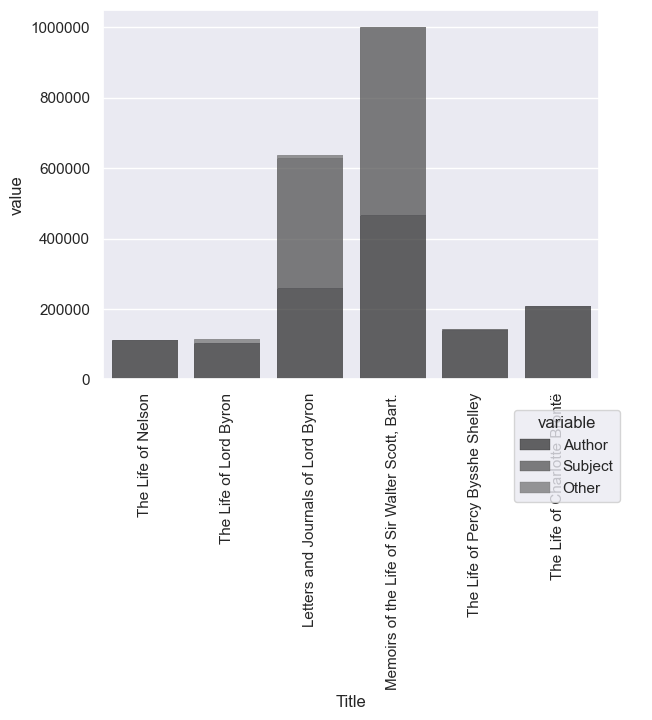

In [147]:
def plot_word_counts(word_count_data: pd.DataFrame):
    # Need this workaround to rotate tick labels
    _, ax = plt.subplots()
    ax.xaxis.set_tick_params(rotation=90)
    return (
        so.Plot(
            data = word_count_data.melt(id_vars=("Title"), value_vars=("Author","Subject","Other")).astype({"value":"int"}),
            x="Title", y="value", color="variable"
        )
        .add(
            so.Bar(edgewidth=0.2), so.Stack()
        )
        .scale(
            y = so.Continuous().label(like=".0f"),
            color = sns.color_palette("gray")
        )
        .on(ax)
    )

figure_6_2 = plot_word_counts(figure_6_2_data)
figure_6_2.show()

In [138]:
help(figure_6_2)

Help on Plot in module seaborn._core.plot object:

class Plot(builtins.object)
 |  Plot(*args, data=None, x=None, y=None, color=None, alpha=None, fill=None, marker=None, pointsize=None, stroke=None, linewidth=None, linestyle=None, fillcolor=None, fillalpha=None, edgewidth=None, edgestyle=None, edgecolor=None, edgealpha=None, text=None, halign=None, valign=None, offset=None, fontsize=None, xmin=None, xmax=None, ymin=None, ymax=None, group=None)
 |  
 |  An interface for declaratively specifying statistical graphics.
 |  
 |  Plots are constructed by initializing this class and adding one or more
 |  layers, comprising a `Mark` and optional `Stat` or `Move`.  Additionally,
 |  faceting variables or variable pairings may be defined to divide the space
 |  into multiple subplots. The mappings from data values to visual properties
 |  can be parametrized using scales, although the plot will try to infer good
 |  defaults when scales are not explicitly defined.
 |  
 |  The constructor accep